In [5]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

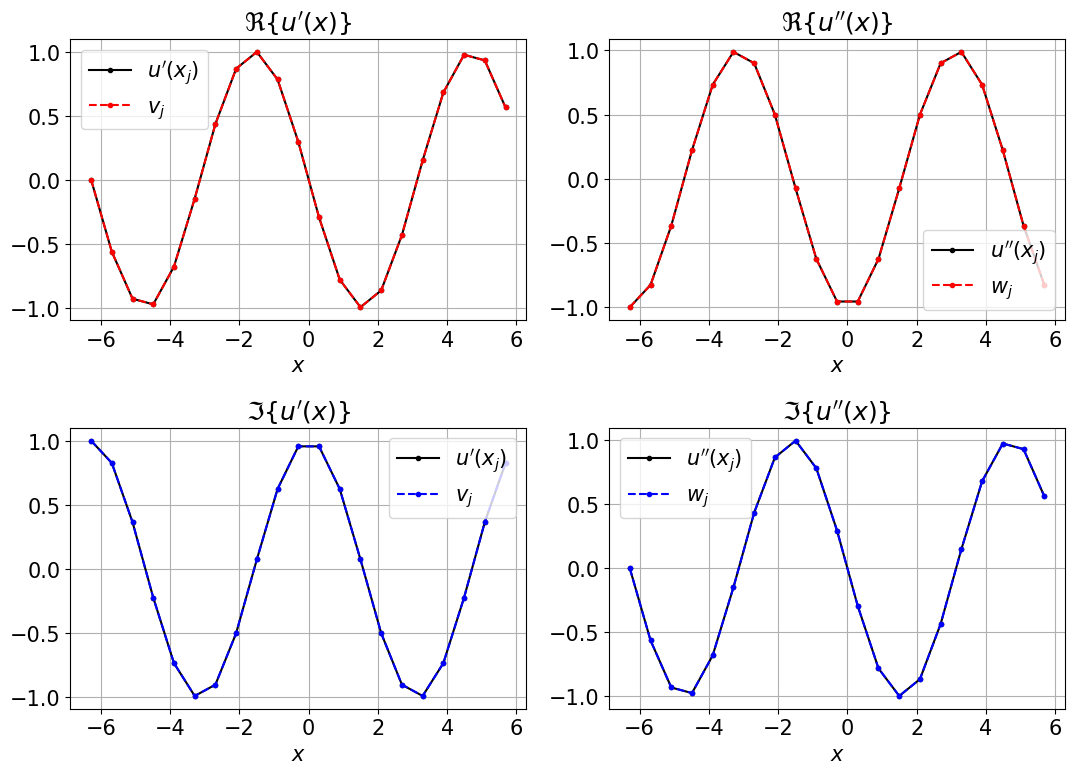

In [6]:
N = 21 # an odd integer
xlim = [-2*np.pi, 2*np.pi]
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
uj = np.exp(1j*xj)

Uj = fft.fft(uj)
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# 1st-order derivatives
Vj = 1j * kj * Uj
vj = fft.ifft(Vj)

# 2nd-order derivatives
Wj = -1 * kj**2 * Uj
wj = fft.ifft(Wj)

# plot
plt.figure(figsize=[11, 8])

plt.subplot(2, 2, 1)
plt.plot(xj, (1j*np.exp(1j*xj)).real, ".-k",
         xj, vj.real, ".--r")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$\\Re\\{u'(x)\\}$")
plt.grid()
#
plt.subplot(2, 2, 2)
plt.plot(xj, (-1*np.exp(1j*xj)).real, ".-k",
         xj, wj.real, ".--r")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$\\Re\\{u''(x)\\}$")
plt.grid()
#
plt.subplot(2, 2, 3)
plt.plot(xj, (1j*np.exp(1j*xj)).imag, ".-k",
         xj, vj.imag, ".--b")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$\\Im\\{u'(x)\\}$")
plt.grid()
#
plt.subplot(2, 2, 4)
plt.plot(xj, (-1*np.exp(1j*xj)).imag, ".-k",
         xj, wj.imag, ".--b")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$\\Im\\{u''(x)\\}$")
plt.grid()

plt.tight_layout()
plt.show()

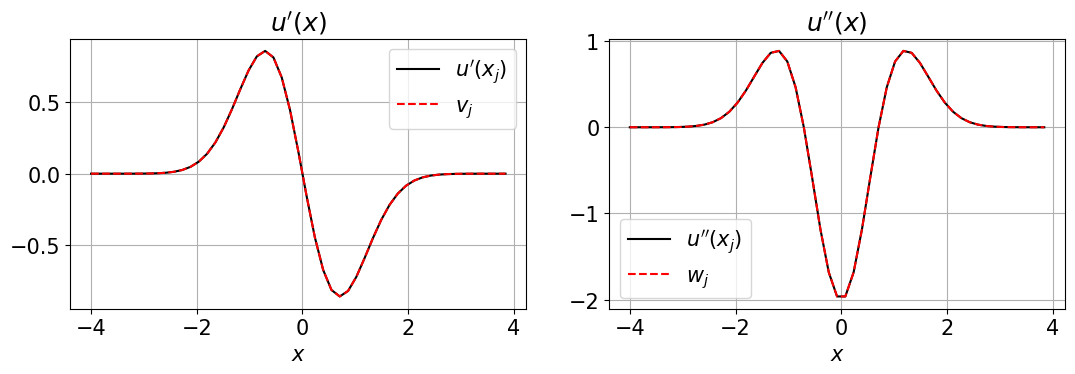

In [8]:
N = 51
xlim = [-4, 4]
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
uj = np.exp(-xj**2)

Uj = fft.fft(uj)
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

# 1st-order derivatives
Vj = 1j * kj * Uj
vj = fft.ifft(Vj)

# 2nd-order derivatives
Wj = -1 * kj**2 * Uj
wj = fft.ifft(Wj)

# plot
plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.plot(xj, -2*xj * np.exp(-xj**2), "-k",
         xj, vj.real, "--r")
plt.legend(["$u'(x_j)$", "$v_j$"])
plt.xlabel("$x$")
plt.title("$u'(x)$")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(xj, -2*np.exp(-xj**2) + (-2*xj)**2 * np.exp(-xj**2), "-k",
         xj, wj.real, "--r")
plt.legend(["$u''(x_j)$", "$w_j$"])
plt.xlabel("$x$")
plt.title("$u''(x)$")
plt.grid()

plt.tight_layout()
plt.show()

In [28]:
N = 121 # number of grid points in x
xlim = [-1, 1] # bound of x
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

dt = 4 / N**2 # stability criterion is a whole different subject...
tmax = 4      # the maximum time to integrate
datadump_freq = int(0.01 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)
print(outer_loop_count)
uj = np.exp(-200 * xj**2)            # u(  0, x)
uj_old = np.exp(-200 * (xj - dt)**2) # u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

for i in range(outer_loop_count):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj

    for _ in range(datadump_freq):
        Uj = fft.fft(uj)
        Wj = -kj**2 * Uj       # approximation for u_xx
        wj = fft.ifft(Wj).real # remove the imaginary part, which should all be zeros
        uj_old, uj = uj, 2*uj - uj_old + dt**2*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj

406


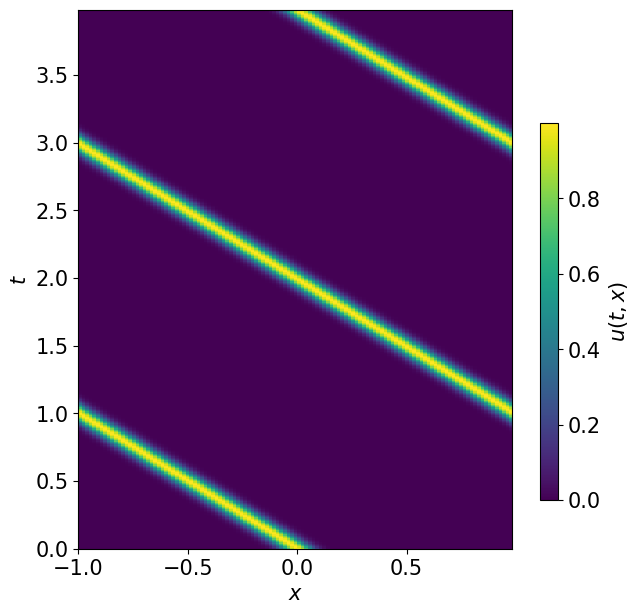

In [29]:
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)

pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

plt.show()

In [21]:
def finite_diff_2nd(N):
    """Create a N-by-N matrix corresponding to the second-order central difference formula."""
    
    assert N > 2, "at least three points are required"
    
    main_diag = -2 * np.eye(N)
    down_diag = np.diagflat(np.ones(N - 1), -1)
    return main_diag + down_diag + down_diag.T

In [30]:
N = 121 # number of grid points in x
xlim = [-1, 1] # bound of x
xj = np.linspace(*xlim, N + 1)[:-1]
dx = xj[1] - xj[0]

# difference matrix
D2 = finite_diff_2nd(N)
print(D2)
D2[ 0, -1] = 1
print(D2)
D2[-1,  0] = 1
print(D2)
D2 /= dx ** 2

dt = 4 / N**2 # stability criterion is a whole different subject...
tmax = 4      # the maximum time to integrate
datadump_freq = int(0.01 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)

uj = np.exp(-200 * xj**2)            # u(  0, x)
uj_old = np.exp(-200 * (xj - dt)**2) # u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

for i in range(outer_loop_count):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj

    for _ in range(datadump_freq):
        wj = D2 @ uj
        uj_old, uj = uj, 2*uj - uj_old + dt**2*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj


[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


In [35]:
a = .2 *np.eye(3)
print(a)


[[0.2 0.  0. ]
 [0.  0.2 0. ]
 [0.  0.  0.2]]


In [39]:
N = 257 # number of grid points in x
xlim = [0, 2*np.pi] # bound of x
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
Dx = xj[1] - xj[0]
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

dt = Dx / 8   # stability criterion is a whole different subject...
tmax = 8      # the maximum time to integrate
datadump_freq = int(0.05 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)

cj = .2 + np.sin(xj - 1)**2
uj = np.exp(-100 * (xj - 1)**2)             # u(  0, x)
uj_old = np.exp(-100 * (xj - 1 + .2*dt)**2) # u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

for i in range(outer_loop_count):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj

    for _ in range(datadump_freq):
        Uj = fft.fft(uj)
        Wj = 1j*kj * Uj
        wj = fft.ifft(Wj).real
        uj_old, uj = uj, uj_old - 2*dt*cj*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj

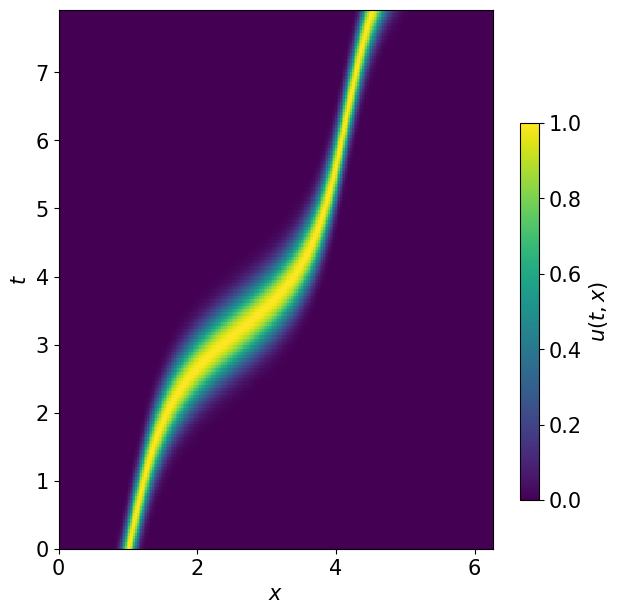

In [40]:
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)

pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

plt.show()